Step 2. 
Get the dataGet the data
Convert the data to a format you can easily manipulate (without changing the data itself).

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import parker
import seaborn as sns
from zlib import crc32


In [2]:
# Read the CSV file
dataset = pd.read_csv('Data/50_Startups.csv')
print(dataset)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [3]:
# Extracting possible features: R&D Spend, Administration, Marketing Spend & State
X = dataset.iloc[:, :-1].values

# Extraction labels: Profit
y = dataset.iloc[:, 4].values

In [4]:
# Check the size and type of data (time series, sample, geographical, etc.).
print('Data set info:')
print(dataset.info())

print('States with count:')
print(dataset["State"].value_counts())

print('Data set type:')
print(type(dataset))

print('Data set description:')
print(dataset.describe())

Data set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
States with count:
New York      17
California    17
Florida       16
Name: State, dtype: int64
Data set type:
<class 'pandas.core.frame.DataFrame'>
Data set description:
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   1

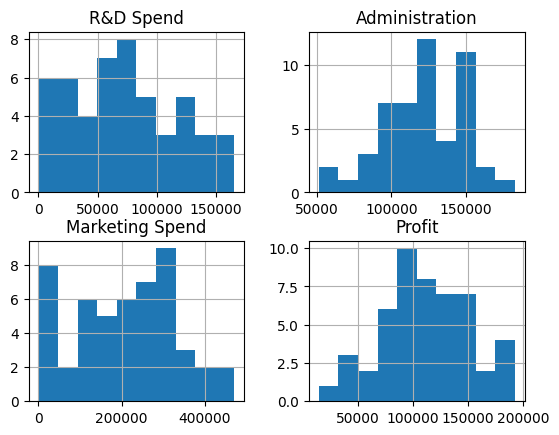

In [5]:
# Visualize the data
dataset.hist()

plt.show()

Create a test set, put it aside, and never look at it (no data snooping!).
A problem here is that the data set is small -> Use stratification.
Action: Make stratified test and learning sets (1 fold).
Code is to be established in your notebook.


In [6]:
train_set, test_set = parker.shuffle_and_split_data(dataset, 0.2)

print(len(train_set))

print(len(test_set))

print(test_set)

40
10
    R&D Spend  Administration  Marketing Spend       State     Profit
11  100671.96        91790.61        249744.55  California  144259.40
10  101913.08       110594.11        229160.95     Florida  146121.95
24   77044.01        99281.34        140574.81    New York  108552.04
5   131876.90        99814.71        362861.36    New York  156991.12
17   94657.16       145077.58        282574.31    New York  125370.37
16   78013.11       121597.55        264346.06  California  126992.93
22   73994.56       122782.75        303319.26     Florida  110352.25
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
48     542.05        51743.15             0.00    New York   35673.41


In [7]:
startup_with_id = dataset.reset_index() # adds an `index` column

train_set, test_set = split_data_with_id_hash(startup_with_id, 0.8, "index")
print("Stable test set based on rows index, 80% size od training set")
print(test_set)

NameError: name 'split_data_with_id_hash' is not defined

In [ ]:
train_set, test_set = train_test_split(dataset, test_size=0.6, random_state=42)

print("test set using sklearn instead")
print(test_set)

In [ ]:
dataset["Marketing Spend"] = pd.cut(dataset["Marketing Spend"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])
 
 
dataset["Marketing Spend"].value_counts().sort_index().plot.bar(rot=0, grid=True) 
plt.xlabel("marketing spend")
plt.ylabel("Number of districts")
plt.show()



In [ ]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(dataset, dataset["Marketing Spend"]):
    strat_train_set_n = dataset.iloc[train_index]
    strat_test_set_n = dataset.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

STEP 2.
Explore the Data
Experementing with Attribute Combinations

In [ ]:
# Show the unique values
dataset.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [ ]:
# Show the dataypes
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
# Get the correlations of the data
corr = dataset.corr()
print(corr)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


/var/folders/sr/60t35rxs16b5bhc31mv2ctvr0000gn/T/ipykernel_25474/2896292339.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


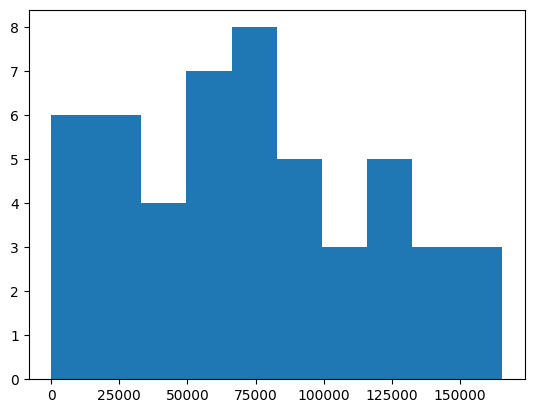

In [ ]:
# Histogram of R&D spend
plt.hist(data=dataset,x='R&D Spend')
plt.show()

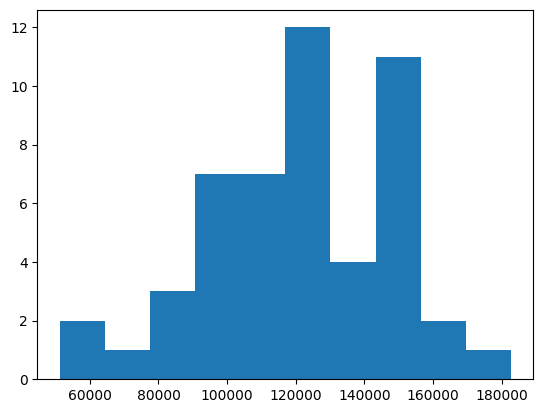

In [ ]:
# Histogram of Administrations
plt.hist(data=dataset,x='Administration')
plt.show()

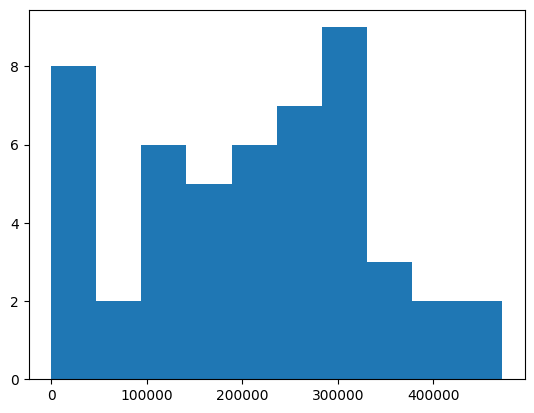

In [ ]:
# Histogram of Market Spendings
plt.hist(data=dataset,x='Marketing Spend')
plt.show()

<Figure size 2000x1000 with 0 Axes>

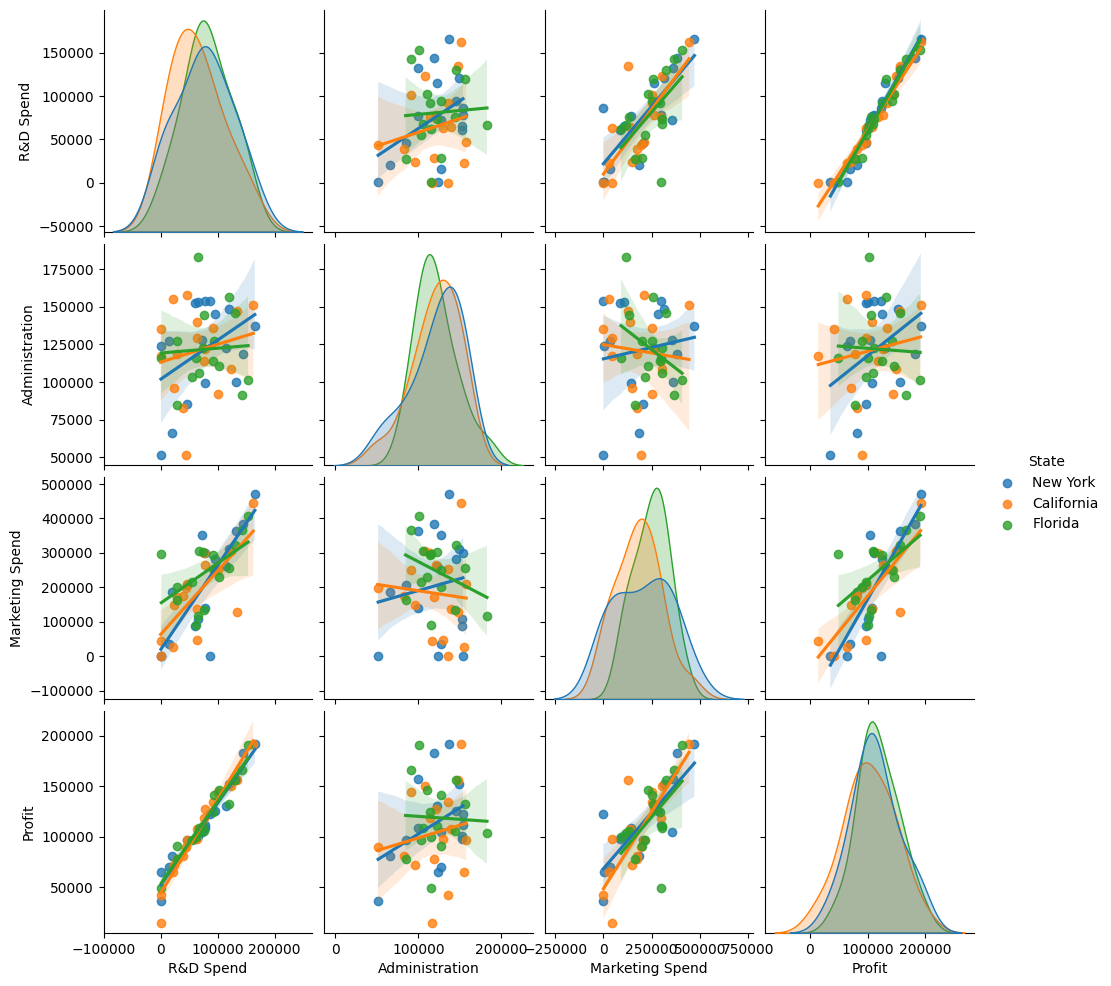

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(data=dataset,hue='State',kind='reg')
plt.show()

ModuleNotFoundError: No module named 'scipy'

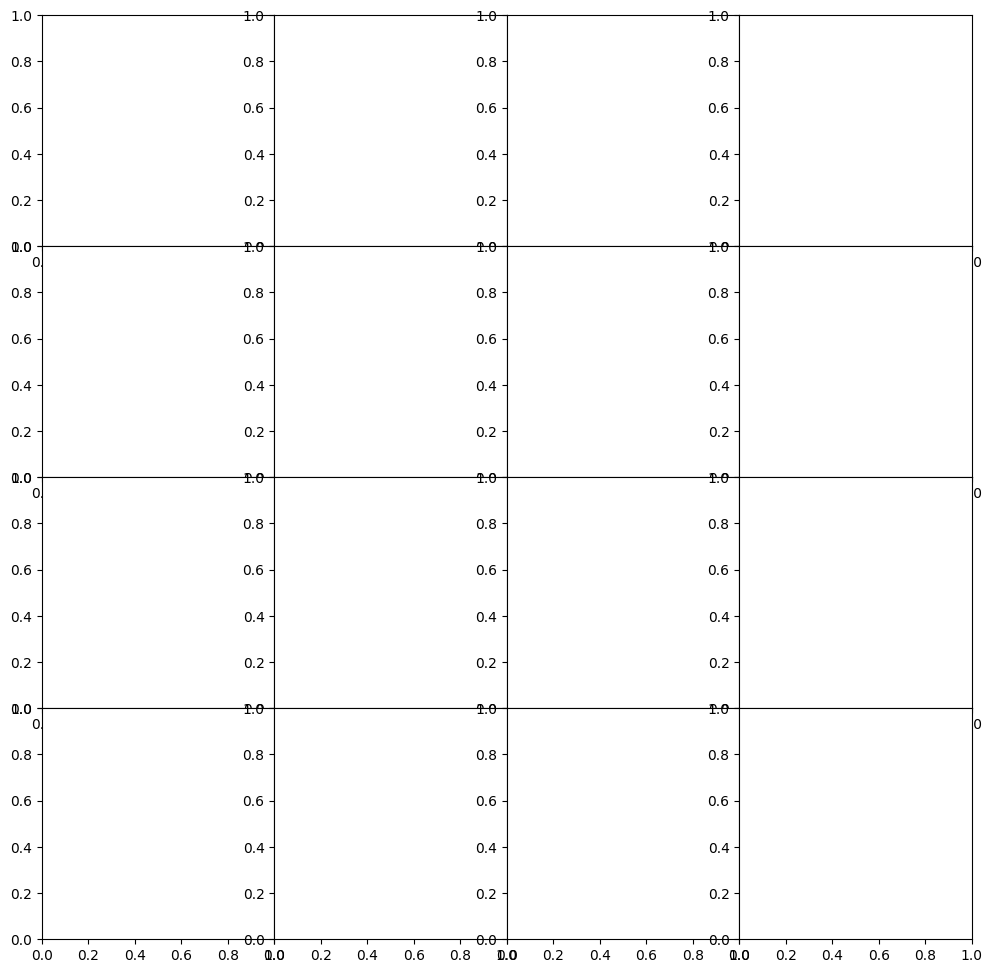

In [ ]:
# Make a sactter matrix plot together with the correlation values
parker.scatter_matrix(dataset)
